# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [7]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [8]:
from time import time

k = 0
e = 10**(-8)

Qup, Qdown, Qleft, Qright = 0, 0, 0, 0

J = {'k' : np.zeros((nX,1), dtype = float), 'k-1' : np.zeros((nX,1), dtype = float)}

elapsed = time()

while True:
    Qup = c[:, 0, None] + gamma * np.dot(U, J['k'])
    Qdown = c[:, 1, None] + gamma * np.dot(D, J['k'])
    Qleft = c[:, 2, None] + gamma * np.dot(L, J['k'])
    Qright = c[:, 3, None] + gamma * np.dot(R, J['k'])
    
    J['k'] = np.min((Qup, Qdown,Qleft, Qright), axis=0)
    
    k = k + 1
    if np.linalg.norm(J['k'] - J['k-1']) < e:
        break
    else:
        J['k-1'] = J['k']
        
elapsed = time() - elapsed
        
Qup = np.transpose(np.array(Qup))
Qdown = np.transpose(np.array(Qdown))
Qleft = np.transpose(np.array(Qleft))
Qright = np.transpose(np.array(Qright))

Q_optimal = np.transpose(np.array([Qup, Qdown, Qleft, Qright]))
Q_optimal = [Q_optimal[j][0] for j in range(len(Q_optimal))] # somehow we were ending up with this kind of matrix [[[]],[[]],...,[[]]]

print(Q_optimal)

print('\n', 'Number of iterations:', k)
print('\n', 'Time spent:', elapsed)

[array([5.84607096, 5.84607096, 5.84607096, 4.89502117]), array([11.57144785, 10.67823015, 11.57144785, 12.45352816]), array([7.0200601 , 7.9475408 , 6.08086879, 7.9475408 ]), array([4.65725873, 3.69420073, 5.60830851, 3.69420073]), array([12.67404824, 11.79196792, 11.79196792, 12.67404824]), array([8.17941097, 9.09532707, 7.25193028, 8.17941097]), array([3.45343623, 2.47821842, 4.41649423, 3.45343623]), array([11.34814342,  9.55043002, 10.45492572, 11.34814342]), array([7.25193028, 9.09532707, 8.17941097, 9.09532707]), array([4.41649423, 4.41649423, 3.45343623, 2.47821842]), array([12.45352816, 11.57144785, 10.67823015, 11.57144785]), array([8.40839  , 9.3243061, 8.40839  , 9.3243061]), array([3.20963178, 2.23441397, 3.20963178, 1.24688279]), array([0.        , 0.        , 0.98753117, 0.        ]), array([8.40839  , 9.3243061, 9.3243061, 9.3243061]), array([3.69420073, 4.65725873, 4.65725873, 4.65725873])]

 Number of iterations: 31

 Time spent: 0.0030395984649658203


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [9]:
def e_greedy(qfunction, state, e = 0.1):
    return np.random.randint(0,3) if np.random.uniform() < e else uniform_min(qfunction[state])

def uniform_min(l):
    min = np.min(l)
    index = []
    
    for i,elem in enumerate(l):
        if min == elem:
            index.append(i)
            
    return np.random.choice(index)

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

In [13]:
def Nvisits(dict, state, action):
    if (state, action) not in dict:
        dict[state, action] = 0
    else:
        dict[state, action] += 1
    return dict[state,action]

n_iterations = 5000
trans_matrix = [np.eye(nX), np.eye(nX), np.eye(nX), np.eye(nX)]
cost_matrix = np.zeros((nX, 4))
Q_model = np.zeros((nX, 4))
norms = {}
Nt = {}

xt = np.random.randint(nX)
reset = False
reset_counter = 2

elapsed = time()

for t in range(n_iterations):
    if reset_counter == 0:
        xt = np.random.randint(nX)
        reset = False
        reset_counter = 2
    
    at = e_greedy(Q_model, xt)
    ct = c[xt, at]
    xt_plus1 = np.random.choice(nX, p = P[at][xt])
        
    alfat = 1/(Nvisits(Nt, xt, at) + 1)
    
    trans_matrix[at][xt, :] *= (1 - alfat)
    trans_matrix[at][xt, xt_plus1] += alfat
    
    cost_matrix[xt, at] = cost_matrix[xt, at] + alfat * (ct - cost_matrix[xt, at])
    
    Q_model[xt, at] = cost_matrix[xt, at] + np.dot(trans_matrix[at][xt], Q_model.min(1))
    
    if ct == 0:
        reset = True
        
    if reset == True:
        reset_counter -= 1
        
    norms[t] = np.linalg.norm(Q_optimal - Q_model)
        
    xt = xt_plus1
        
elapsed = time() - elapsed
print('Time elapsed:', elapsed)



Time elapsed: 0.6857645511627197


<IPython.core.display.Javascript object>


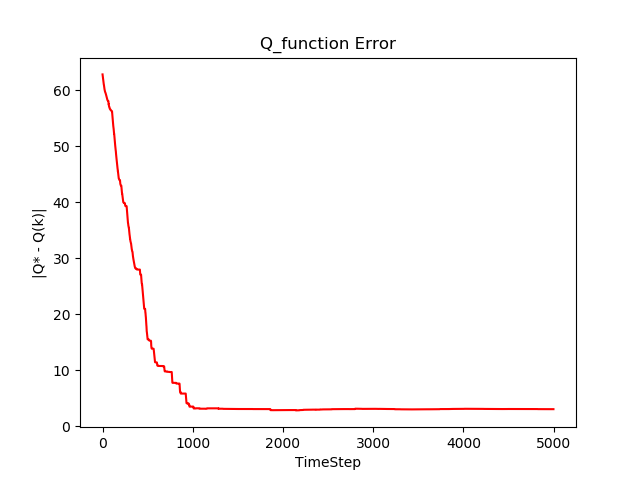

In [5]:
plt.figure()
plt.plot([i for i in range(0, 5000, 1)], [norms[i] for i in range(0, 5000, 1)], 'r')
plt.xlabel('TimeStep')
plt.ylabel('|Q* - Q(k)|')
plt.title('Q_function Error')
plt.show()

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

In [37]:
Q_star_qlearning = np.zeros((nX, 4))
alfa = 0.3
norms_qlearning = {}
xt = np.random.randint(nX)

reset = False
reset_counter = 2

elapsed = time()

for t in range(n_iterations):
    if reset_counter == 0:
        xt = np.random.randint(nX)
        reset = False
        reset_counter = 2
        
    at = e_greedy(Q_star_qlearning, xt)
    ct = c[xt, at]
    xt_plus1 = np.random.choice(nX, p = P[at][xt])
    
    Q_star_qlearning[xt, at] = Q_star_qlearning[xt, at] + alfa * (ct + gamma * np.min(Q_star_qlearning[xt_plus1]) - Q_star_qlearning[xt, at])
   
    if ct == 0:
        reset = True
        
    if reset == True:
        reset_counter -= 1

    norms_qlearning[t] = np.linalg.norm(Q_optimal - Q_star_qlearning)
        
    xt = xt_plus1
    
elapsed = time() - elapsed
print('Time elapsed:', elapsed)


Time elapsed: 0.3507964611053467


---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

In [53]:
Q_star_SARSA = np.zeros((nX, 4))
alfa = 0.3
norms_SARSA = {}
xt = np.random.randint(nX)

reset = False
reset_counter = 2

elapsed = time()

for t in range(n_iterations):
    if reset_counter == 0:
        xt = np.random.randint(nX)
        reset = False
        reset_counter = 2
    at = e_greedy(Q_star_SARSA, xt)
    ct = c[xt, at]
    xt_plus1 = np.random.choice(nX, p = P[at][xt])
    at_plus1 = e_greedy(Q_star_SARSA, xt_plus1)   
    
    Q_star_SARSA[xt,at] = Q_star_SARSA[xt,at]+alfa*(ct+gamma*Q_star_SARSA[xt_plus1,at_plus1]-Q_star_SARSA[xt,at])

    if ct == 0:
        reset = True
        
    if reset == True:
        reset_counter -= 1
    
    norms_SARSA[t] = np.linalg.norm(Q_optimal - Q_star_SARSA)
    
    xt = xt_plus1
    
elapsed = time() - elapsed
print('Time elapsed:', elapsed)

Time elapsed: 0.4017503261566162


<IPython.core.display.Javascript object>


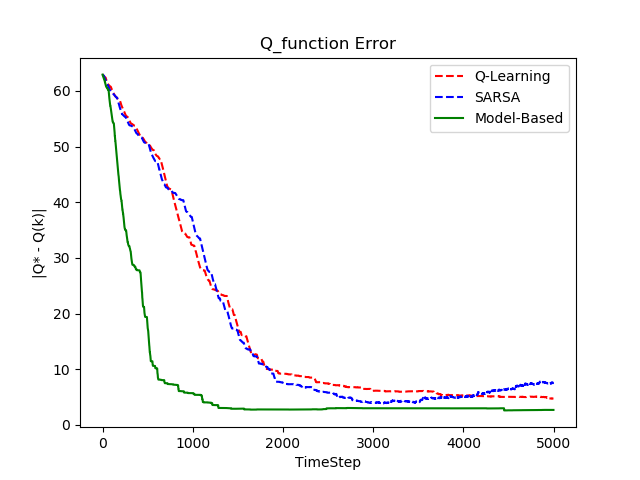

In [54]:
plt.figure()
plt.plot([i for i in range(0, 5000, 1)], [norms_qlearning[i] for i in range(0, 5000, 1)], '--r',label='Q-Learning')
plt.plot([i for i in range(0, 5000, 1)], [norms_SARSA[i] for i in range(0, 5000, 1)], '--b',label='SARSA')
plt.plot([i for i in range(0, 5000, 1)], [norms[i] for i in range(0, 5000, 1)], 'g',label='Model-Based')
plt.xlabel('TimeStep')
plt.ylabel('|Q* - Q(k)|')
plt.title('Q_function Error')
plt.legend(loc='best')
plt.show()

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

In [ ]:
The Q-Learning algorithm was the fastest by around 15-20%. Despite that, it yielded better long-term results than SARSA, which started diverging after timestep=3000. The model yielded the best results all the way as expected. SARSA was slightly better at the start and only surpassed Q-Learning again between 1300 and 4000.